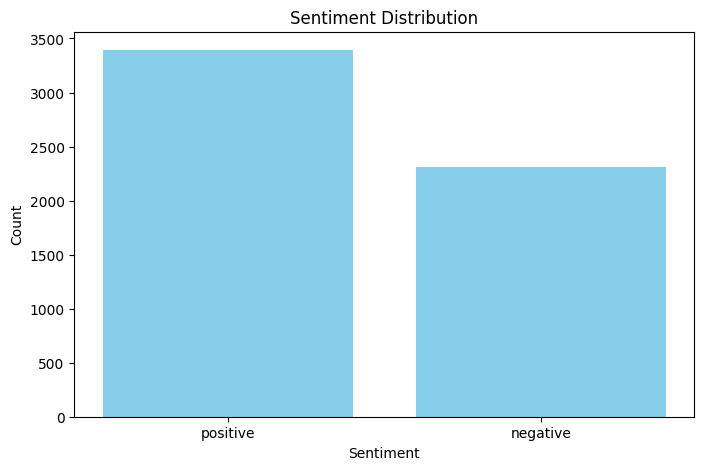

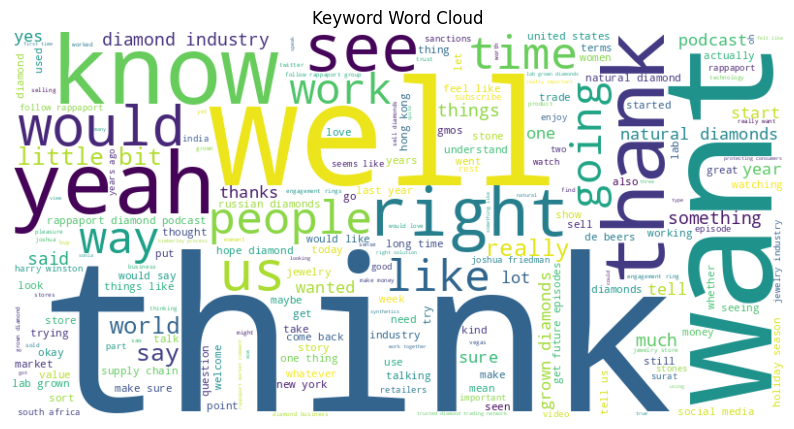

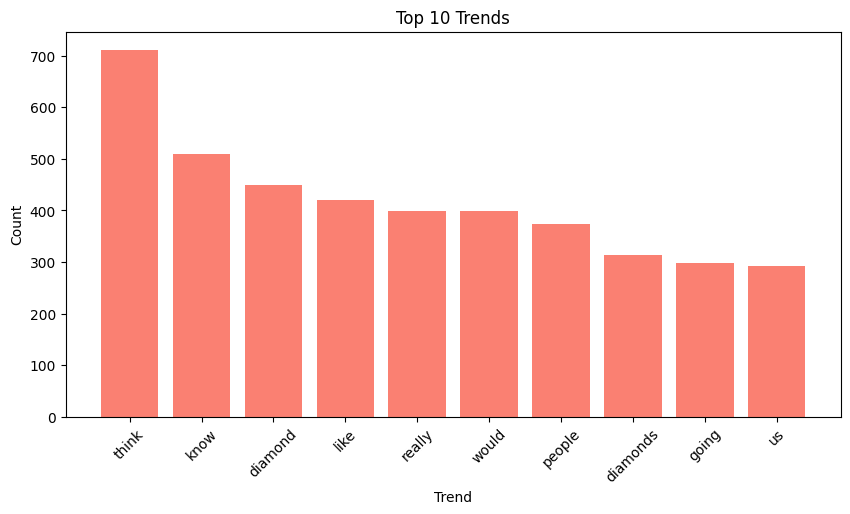

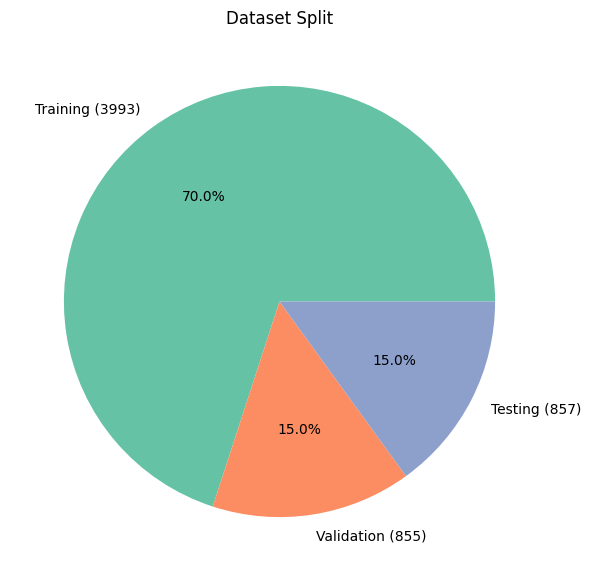


=== Dataset Split Summary ===
Total Examples: 5705
Training Examples: 3993
Validation Examples: 855
Testing Examples: 857


=== Example Sentences from Each Dataset Split ===

** Training Examples **
1. Sentence:  Welcome to the Rappaport Diamond podcast and now your host Joshua Friedman.
   Sentiment: positive

2. Sentence: Great to be here, Joshua.
   Sentiment: positive

3. Sentence: So we are going to talk about some of our favorite moments from this year in terms of, well, favorites, maybe not the right word, because some of them are serious issues.
   Sentiment: positive

** Validation Examples **
1. Sentence: And the biggest reason again is memo.
   Sentiment: positive

2. Sentence: They will pay  a couple extra points to safeguard them.
   Sentiment: negative

3. Sentence: And just before we finish, just two very final and short points.
   Sentiment: negative

** Testing Examples **
1. Sentence: It's incredible.
   Sentiment: positive

2. Sentence: We always see celebrities wea

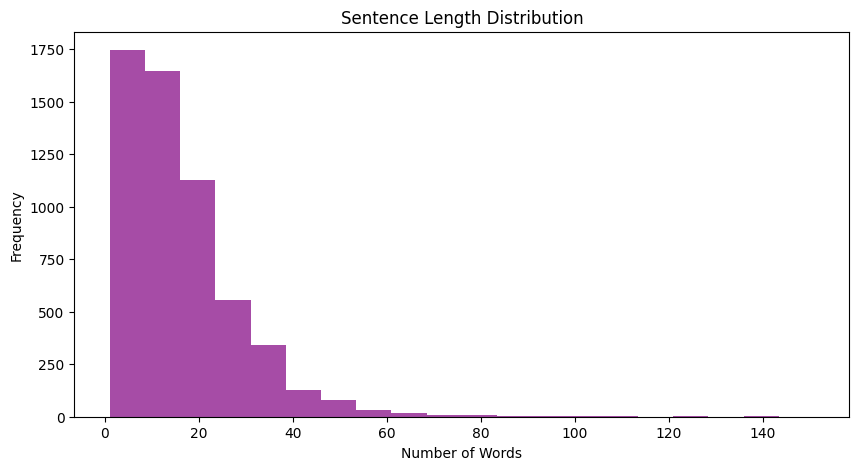

In [5]:
import json
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

# Load labeled dataset
dataset_path = "combined_dataset.json"
with open(dataset_path, 'r') as f:
    data = json.load(f)

# 1. Sentiment Distribution
def plot_sentiment_distribution(data):
    sentiments = [entry['sentiment'] for entry in data]
    sentiment_counts = Counter(sentiments)
    
    plt.figure(figsize=(8, 5))
    plt.bar(sentiment_counts.keys(), sentiment_counts.values(), color='skyblue')
    plt.title("Sentiment Distribution")
    plt.xlabel("Sentiment")
    plt.ylabel("Count")
    plt.show()

# 2. Keyword Frequency Word Cloud
def plot_keyword_wordcloud(data):
    keywords = [kw for entry in data for kw in entry.get('keywords', [])]
    keyword_counts = Counter(keywords)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(keyword_counts)
    
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Keyword Word Cloud")
    plt.show()

# 3. Trend Distribution
def plot_trend_distribution(data):
    trends = [trend for entry in data for trend in entry.get('trends', [])]
    trend_counts = Counter(trends)
    top_trends = trend_counts.most_common(10)  # Top 10 trends
    
    plt.figure(figsize=(10, 5))
    plt.bar([t[0] for t in top_trends], [t[1] for t in top_trends], color='salmon')
    plt.title("Top 10 Trends")
    plt.xlabel("Trend")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

# 4. Dataset Split
def plot_dataset_split_with_counts(data, train_pct=70, val_pct=15, test_pct=15):
    total = len(data)
    train_count = int(total * train_pct / 100)
    val_count = int(total * val_pct / 100)
    test_count = total - train_count - val_count

    # Split dataset
    train_data = data[:train_count]
    val_data = data[train_count:train_count + val_count]
    test_data = data[train_count + val_count:]

    # Pie chart with counts in labels
    sizes = [len(train_data), len(val_data), len(test_data)]
    labels = [
        f'Training ({len(train_data)})',
        f'Validation ({len(val_data)})',
        f'Testing ({len(test_data)})'
    ]

    plt.figure(figsize=(7, 7))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['#66c2a5', '#fc8d62', '#8da0cb'])
    plt.title("Dataset Split")
    plt.show()

    # Print the counts
    print("\n=== Dataset Split Summary ===")
    print(f"Total Examples: {total}")
    print(f"Training Examples: {len(train_data)}")
    print(f"Validation Examples: {len(val_data)}")
    print(f"Testing Examples: {len(test_data)}\n")

    # Display sample examples
    print("\n=== Example Sentences from Each Dataset Split ===\n")
    print("** Training Examples **")
    for i, entry in enumerate(train_data[:3]):  # Show 3 examples
        print(f"{i + 1}. Sentence: {entry['sentence'][0]}")
        print(f"   Sentiment: {entry['sentiment']}\n")
    
    print("** Validation Examples **")
    for i, entry in enumerate(val_data[:3]):  # Show 3 examples
        print(f"{i + 1}. Sentence: {entry['sentence'][0]}")
        print(f"   Sentiment: {entry['sentiment']}\n")
    
    print("** Testing Examples **")
    for i, entry in enumerate(test_data[:3]):  # Show 3 examples
        print(f"{i + 1}. Sentence: {entry['sentence'][0]}")
        print(f"   Sentiment: {entry['sentiment']}\n")

# 5. Sentence Length Distribution
def plot_sentence_length_distribution(data):
    sentence_lengths = [len(entry['sentence'][0].split()) for entry in data]  # Assuming 1 sentence per entry
    
    plt.figure(figsize=(10, 5))
    plt.hist(sentence_lengths, bins=20, color='purple', alpha=0.7)
    plt.title("Sentence Length Distribution")
    plt.xlabel("Number of Words")
    plt.ylabel("Frequency")
    plt.show()

# Call all plotting functions
plot_sentiment_distribution(data)
plot_keyword_wordcloud(data)
plot_trend_distribution(data)
plot_dataset_split_with_counts(data)
plot_sentence_length_distribution(data)
